In [11]:
import nltk
import numpy as np
import pandas as pd
import re
import string

data=pd.read_csv("H:\Aegis\PROJECTS\Spam\spam.csv", encoding='latin-1')
data.head()
#looking at the data. we are only interested in v1 and v2 we can drop all the rest of the columns also check the length of data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
data.shape

(5572, 5)

In [13]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [14]:
data= data.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis=1)
data.columns= ["Label","TextBody"]
data


,Label,TextBody
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
# Here before we clean the data, we could check and create new features which might help us in the classification.
#few new features that could generate are, length of each emails, punctuation and Uppercases, etc. 

In [16]:
data["BodyLength"]= data["TextBody"].apply(lambda x: len(x)- x.count(" "))



In [17]:
data.head()

,Label,TextBody,BodyLength
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


In [18]:
def countofpunctuations(text):
    count = sum([1 for letter in text if letter in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

In [19]:
data["punctpercent"] = data["TextBody"].apply(lambda n: countofpunctuations(n))

In [20]:
data["Label"].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [21]:

#number of letters that are capitalized. #the news features are generally created for easy distinguishing between spam and ham
def upper(text):
    t =sum([1 for i in text if ord(i) >= 65 and ord(i) <= 90])
    return t


In [22]:
data["UppercaseLetters"]=data["TextBody"].apply(lambda n: upper(n))


In [23]:
data

,Label,TextBody,BodyLength,punctpercent,UppercaseLetters
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8,3
1,ham,Ok lar... Joking wif u oni...,24,25.0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,10
3,ham,U dun say so early hor... U c already then say...,39,15.4,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,132,6.1,9
5568,ham,Will Ì_ b going to esplanade fr home?,30,6.7,1
5569,ham,"Pity, * was in mood for that. So...any other s...",48,14.6,2
5570,ham,The guy did some bitching but I acted like i'd...,100,1.0,2


In [24]:
data["TextBody"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Lets do the analysis of all the features that we have generated. 

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt



#BodyLength with both Spam and Ham Labels

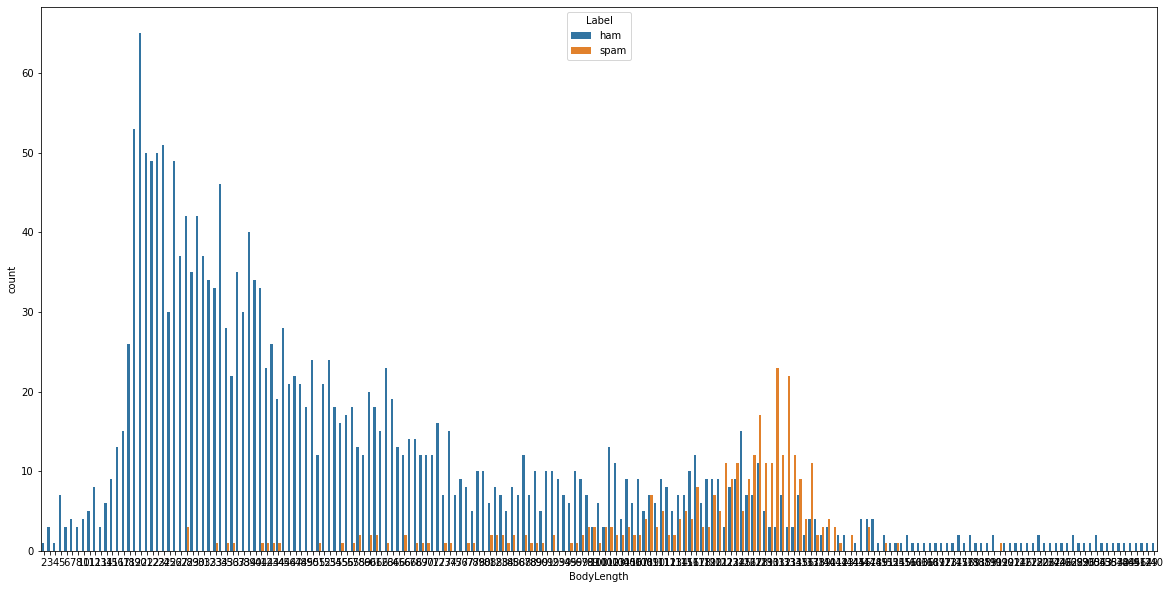

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data["BodyLength"][:2500], hue=data["Label"])
#by this we can definitely say that the hypotheses of having spam messages of bigger length stands true and would help us in our further classification

Text(0.5, 1.0, 'Body Length Distribution')

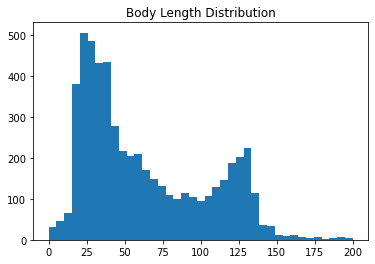

In [27]:
bins= np.linspace(0,200,40)
plt.hist(data["BodyLength"], bins= bins) #looks bimodal so we dont really need to transform it
plt.title("Body Length Distribution")

In [28]:
data["UppercaseLetters"].max()

128

Text(0.5, 1.0, 'Punctuation percent Distribution')

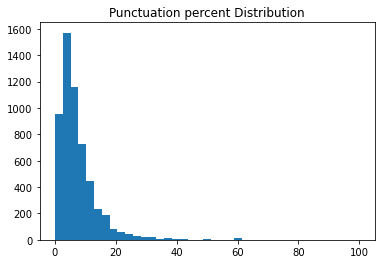

In [29]:
bins= np.linspace(0,100,40)
plt.hist(data["punctpercent"], bins= bins) #fairly skewed, a feature which would grab our attention to transform it
plt.title("Punctuation percent Distribution")

(array([156., 271., 215.,  80.,  16.,   5.,   2.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.        ,   2.56410256,   5.12820513,   7.69230769,
         10.25641026,  12.82051282,  15.38461538,  17.94871795,
         20.51282051,  23.07692308,  25.64102564,  28.20512821,
         30.76923077,  33.33333333,  35.8974359 ,  38.46153846,
         41.02564103,  43.58974359,  46.15384615,  48.71794872,
         51.28205128,  53.84615385,  56.41025641,  58.97435897,
         61.53846154,  64.1025641 ,  66.66666667,  69.23076923,
         71.79487179,  74.35897436,  76.92307692,  79.48717949,
         82.05128205,  84.61538462,  87.17948718,  89.74358974,
         92.30769231,  94.87179487,  97.43589744, 100.        ]),
 <a list of 39 Patch objects>)

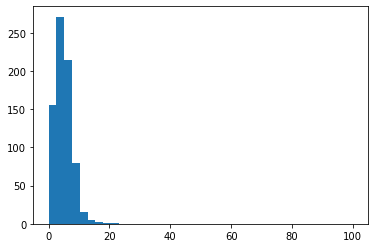

In [30]:
bins=np.linspace(0,100,40)
plt.hist(data[data["Label"]=="spam"]["punctpercent"], bins, label="spam")


(array([483., 318., 638., 662., 526., 415., 362., 284., 273., 154., 126.,
        103.,  91.,  96.,  46.,  34.,  30.,  31.,  21.,  20.,  11.,  15.,
          5.,  13.,   9.,  12.,   0.,   4.,   1.,   9.,   1.,   6.,   2.,
          6.,   1.,   0.,   0.,   0.,   4.]),
 array([ 0.        ,  1.28205128,  2.56410256,  3.84615385,  5.12820513,
         6.41025641,  7.69230769,  8.97435897, 10.25641026, 11.53846154,
        12.82051282, 14.1025641 , 15.38461538, 16.66666667, 17.94871795,
        19.23076923, 20.51282051, 21.79487179, 23.07692308, 24.35897436,
        25.64102564, 26.92307692, 28.20512821, 29.48717949, 30.76923077,
        32.05128205, 33.33333333, 34.61538462, 35.8974359 , 37.17948718,
        38.46153846, 39.74358974, 41.02564103, 42.30769231, 43.58974359,
        44.87179487, 46.15384615, 47.43589744, 48.71794872, 50.        ]),
 <a list of 39 Patch objects>)

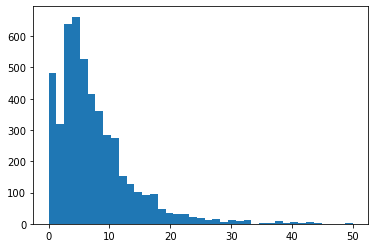

In [31]:
bins=np.linspace(0,50,40)
plt.hist(data[data["Label"]=="ham"]["punctpercent"], bins, label="ham")

Text(0.5, 1.0, 'Uppercase Letters Distribution')

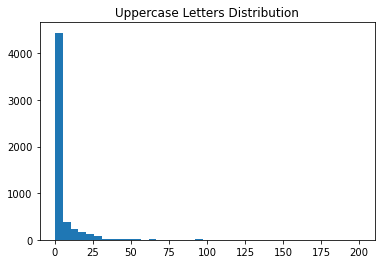

In [32]:
bins= np.linspace(0,200,40)
plt.hist(data["UppercaseLetters"], bins= bins) #attention to transform it
plt.title("Uppercase Letters Distribution")

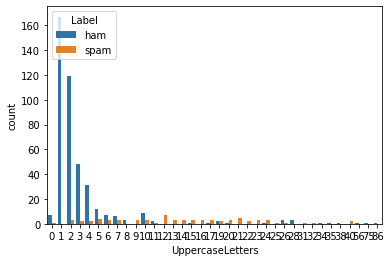

In [33]:
sns.countplot(data["UppercaseLetters"][:500], hue=data["Label"],) #here the hypotheses of spam using Uppercase turns out to be false and ham is found out to be using most of the uppercase

(array([21., 28., 32., 53., 22., 36., 26., 52., 30., 41., 71., 19., 22.,
        32., 49., 20., 19., 41., 21., 17., 15., 15., 15.,  6.,  8.,  1.,
         3.,  5.,  2.,  1.,  0.,  7.,  1.,  1.,  1.,  0.,  0.,  3.,  0.]),
 array([ 0.        ,  1.28205128,  2.56410256,  3.84615385,  5.12820513,
         6.41025641,  7.69230769,  8.97435897, 10.25641026, 11.53846154,
        12.82051282, 14.1025641 , 15.38461538, 16.66666667, 17.94871795,
        19.23076923, 20.51282051, 21.79487179, 23.07692308, 24.35897436,
        25.64102564, 26.92307692, 28.20512821, 29.48717949, 30.76923077,
        32.05128205, 33.33333333, 34.61538462, 35.8974359 , 37.17948718,
        38.46153846, 39.74358974, 41.02564103, 42.30769231, 43.58974359,
        44.87179487, 46.15384615, 47.43589744, 48.71794872, 50.        ]),
 <a list of 39 Patch objects>)

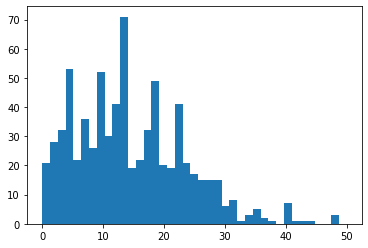

In [34]:
bins=np.linspace(0,50,40)
plt.hist(data[data["Label"]=="spam"]["UppercaseLetters"], bins, label="spam")
#lt.hist(data[data["Label"]=="ham"]["UppercaseLetters"], bins, label="ham")

(array([2.009e+03, 1.315e+03, 5.790e+02, 4.070e+02, 8.700e+01, 6.100e+01,
        5.000e+01, 4.300e+01, 2.500e+01, 2.200e+01, 1.500e+01, 1.700e+01,
        1.400e+01, 1.300e+01, 1.100e+01, 1.000e+01, 0.000e+00, 1.400e+01,
        5.000e+00, 5.000e+00, 1.200e+01, 1.500e+01, 2.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 7.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
        5.000e+00, 1.000e+00, 4.000e+00]),
 array([ 0.        ,  1.28205128,  2.56410256,  3.84615385,  5.12820513,
         6.41025641,  7.69230769,  8.97435897, 10.25641026, 11.53846154,
        12.82051282, 14.1025641 , 15.38461538, 16.66666667, 17.94871795,
        19.23076923, 20.51282051, 21.79487179, 23.07692308, 24.35897436,
        25.64102564, 26.92307692, 28.20512821, 29.48717949, 30.76923077,
        32.05128205, 33.33333333, 34.61538462, 35.8974359 , 37.17948718,
        38.46153846, 39.74358974, 41.02564103, 42.30769231, 43.58974359,
  

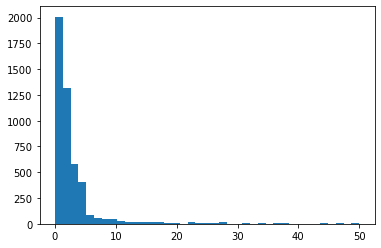

In [35]:
bins=np.linspace(0,50,40)
#plt.hist(data[data["Label"]=="spam"]["UppercaseLetters"], bins, label="spam")
plt.hist(data[data["Label"]=="ham"]["UppercaseLetters"], bins, label="ham")

In [36]:
#So we conclude that uppercase counts in Ham is lesser than Spam. 

In [37]:
#Lets transform our skewed feature that is Punctuation percent. We use power transformation for skewed data
data["punctpercent"].skew()  #Highly skewed this is above 1.5

3.421559513187034

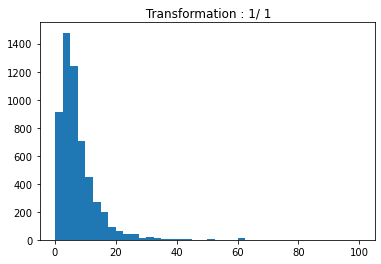

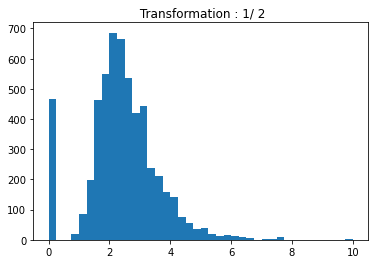

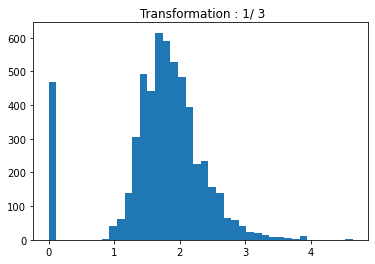

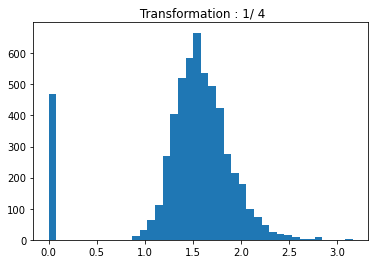

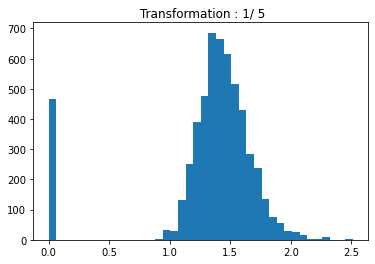

In [38]:

for i in range(1,6):
    plt.hist((data["punctpercent"])**(1/i) , bins=40)
    plt.title(" Transformation : 1/ {}".format(str(i)))
    plt.show()

In [39]:
data["punctpercent"]=data["punctpercent"]**(1/4)

0       1.769321
1       2.236068
2       1.472395
3       1.980980
4       1.422971
          ...   
5567    1.571565
5568    1.608862
5569    1.954736
5570    1.000000
5571    1.480166
Name: punctpercent, Length: 5572, dtype: float64

In [40]:
#CLEAN THE DATA BEFORE PUTTING IT INTO TEST

In [41]:
#take stopwords from the nltk corpus to remove them from our data
stopwords=nltk.corpus.stopwords.words("english") #stopwords
ps=nltk.PorterStemmer() #stemming the words.

In [42]:
string.punctuation #we need to remove the punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
#lets create a function to remove all the punctuation, stopwords, space and keep everything into lowercase
def clean_data(rawdata):
    text="".join([word.lower() for word in rawdata if word not in string.punctuation])
    tokens=re.split("\W+", text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [44]:
data["TextBody"]=data["TextBody"].apply(lambda n: clean_data(n))

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(analyzer= clean_data )
x_tfidf = tfidf.fit_transform(data["TextBody"])

In [46]:
X = pd.concat([data["BodyLength"],data["punctpercent"],data["UppercaseLetters"],pd.DataFrame(x_tfidf.toarray())], axis=1)
X.head()

,BodyLength,punctpercent,UppercaseLetters,0,1,2,3,4,5,6,...,5102,5103,5104,5105,5106,5107,5108,5109,5110,5111
0,92,1.769321,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,2.236068,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,1.472395,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,1.980980,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,1.422971,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
y=pd.get_dummies(data["Label"],drop_first=True)

In [86]:
y=np.array(y)
y.shape


(5572, 1)

# RANDOM FOREST CLASSIFIER through cross validation

In [88]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold, cross_val_score
# rf= RandomForestClassifier(n_jobs= -1)
# kfold = KFold(n_splits=5)

# cross_val_score(rf, X, y, cv= kfold, scoring= "accuracy",n_jobs= -1)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [113]:
import numpy as np
a=(0.95246637, 0.95426009, 0.96588869, 0.94254937, 0.95870736)
np.mean(a)

0.9547743759999999

In [142]:
data.columns

Index(['Label', 'TextBody', 'BodyLength', 'punctpercent', 'UppercaseLetters'], dtype='object')

In [123]:
# def upper(text):
#     t =sum([1 for i in text if ord(i) >= 65 and ord(i) <= 90])
#     return t
# upper("HEMA jaLMoru")

6

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,data["Label"], test_size=0.33, random_state=42)

In [67]:
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X_train,y_train)

GaussianNB()

In [68]:
# predicted= model.predict(X_test)

In [69]:
# from sklearn.metrics import classification_report, accuracy_score
# accuracy_score(y_test,predicted)

0.2262098966829799

In [125]:
# print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         ham       1.00      0.10      0.19      1587
        spam       0.15      1.00      0.26       252

    accuracy                           0.23      1839
   macro avg       0.58      0.55      0.22      1839
weighted avg       0.88      0.23      0.20      1839



In [95]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs= -1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [96]:
predict=rf.predict(X_test)

In [97]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         ham       0.96      0.99      0.97      1587
        spam       0.91      0.75      0.82       252

    accuracy                           0.96      1839
   macro avg       0.94      0.87      0.90      1839
weighted avg       0.95      0.96      0.95      1839



In [73]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X_train, y_train)

In [144]:

# predict=clf.predict(X_test)

In [145]:
# print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         ham       0.88      0.97      0.92      1587
        spam       0.50      0.19      0.28       252

    accuracy                           0.86      1839
   macro avg       0.69      0.58      0.60      1839
weighted avg       0.83      0.86      0.84      1839



In [91]:
import pickle

In [98]:
savedmodel= pickle.dumps(rf)

In [100]:
modelfrompickle=pickle.loads(savedmodel)

In [101]:
y_pred=modelfrompickle.predict(X_test)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.99      0.97      1587
        spam       0.91      0.75      0.82       252

    accuracy                           0.96      1839
   macro avg       0.94      0.87      0.90      1839
weighted avg       0.95      0.96      0.95      1839



In [104]:
import joblib

In [106]:
joblib.dump(rf,"picklefile.pkl")

['picklefile.pkl']

In [ ]:
# we  need one more pickle file for transform from the user input into numerical.